In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
kolom = ['Name','Ticket','Cabin','Embarked']
df.drop(kolom,axis=1, inplace=True)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [5]:
df.set_index('PassengerId',inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
# Imputasi
median = df.Age.median()
df.fillna(df['Age'].median(),inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
mapping = {'female':0,
          'male':1}
df['Sex'] = df['Sex'].map(mapping)

In [11]:
X = df.drop('Survived',axis=1)
y = df.Survived

In [12]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000
888,1,0,19.0,0,0,30.0000
889,3,0,28.0,1,2,23.4500


In [13]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [15]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
# X_scaler_feature = scaler.transform(X_train)
df_scaller = pd.DataFrame(X_scaler, columns=X_train.columns)
df_scaller

,Pclass,Sex,Age,SibSp,Parch,Fare
0,-1.552477,0.742427,0.831378,-0.466808,-0.484165,-0.093938
1,0.834917,-1.346933,-1.996085,0.421874,0.704544,-0.320562
2,0.834917,0.742427,1.381162,-0.466808,-0.484165,-0.478899
3,0.834917,0.742427,-1.603382,3.087920,1.893253,-0.018539
4,0.834917,0.742427,-0.739435,-0.466808,-0.484165,-0.461506
...,...,...,...,...,...,...
707,0.834917,-1.346933,0.045972,-0.466808,-0.484165,-0.485839
708,0.834917,0.742427,-0.111110,-0.466808,-0.484165,-0.484811
709,-1.552477,0.742427,3.266138,-0.466808,-0.484165,0.353999
710,-1.552477,0.742427,-0.111110,-0.466808,-0.484165,3.896533


In [34]:
svm = SVC(kernel='linear')
svm.fit(df_scaller, y_train)

SVC(kernel='linear')

In [35]:
y_pred_svm = svm.predict(X_test)

In [36]:
print("Classification Report : \n", classification_report(y_test, y_pred_svm))

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.68      0.71       100
           1       0.63      0.70      0.66        79

    accuracy                           0.69       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.69      0.69      0.69       179



In [16]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = rf.predict(X_test)

In [19]:
print("Classification Report : \n", classification_report(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.83      0.73      0.78        79

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



In [21]:
with open('model.pkl','wb') as f:
    pickle.dump(rf, f)

In [30]:
df_new = [1, 1, 25, 1, 0, 7000]
preds = rf.predict([df_new])
"Survived" if preds[0] == 1 else "Not Survived"

D:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Survived'

In [31]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

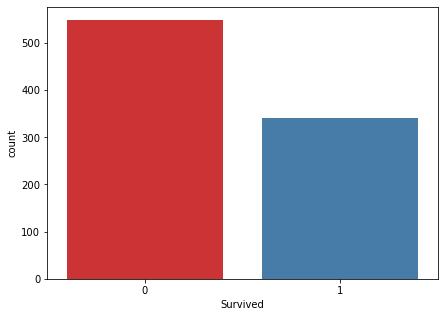

In [33]:
f, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x = 'Survived', data=df, palette='Set1')
plt.show()